## Static Plot

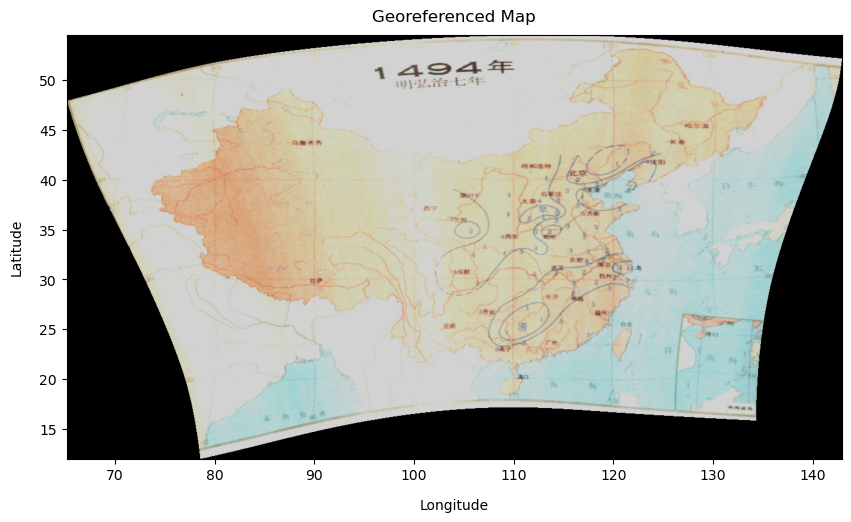

In [1]:
import matplotlib.pyplot as plt
import rasterio

geotiff = "../data/outputs/map18_1494_georef.tif"

with rasterio.open(geotiff) as src:
    img = src.read([1, 2, 3])
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

plt.figure(figsize=(10, 8))
plt.imshow(img.transpose(1, 2, 0), extent=extent)
plt.title("Georeferenced Map", pad=10)
plt.xlabel("Longitude", labelpad=11); plt.ylabel("Latitude", labelpad=11)
plt.savefig("../data/outputs/map18_1494_georef.png", dpi=300, bbox_inches="tight")
plt.show()

## Overlay GCPs

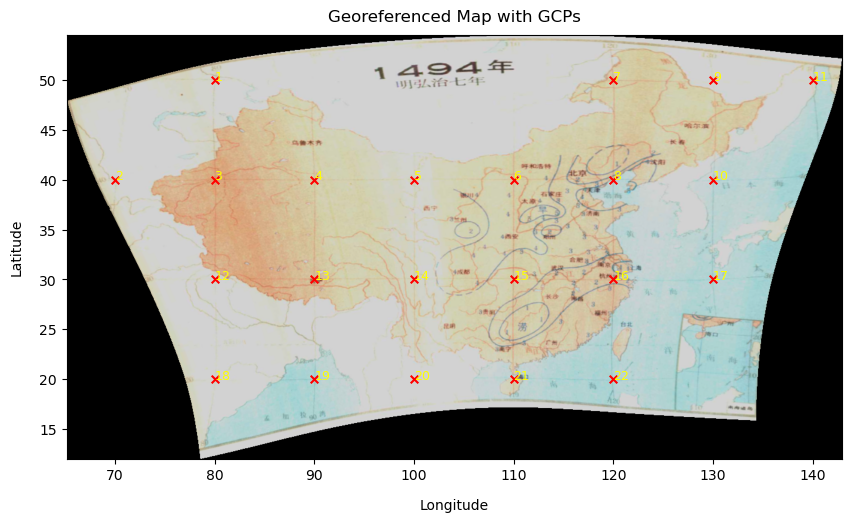

In [2]:
import json
import matplotlib.pyplot as plt
import rasterio

geotiff = "../data/outputs/map18_1494_georef.tif"
gcps_json = "../data/gcps/gcps.json"
 
with rasterio.open(geotiff) as src:
    img = src.read([1,2,3])
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

gcps = json.load(open(gcps_json, "r"))
lons = [g["lonlat"][0] for g in gcps]
lats = [g["lonlat"][1] for g in gcps]

plt.figure(figsize=(10,8))
plt.imshow(img.transpose(1,2,0), extent=extent)
plt.scatter(lons, lats, s=30, c="red", marker="x")
for i,(x,y) in enumerate(zip(lons,lats),1):
    plt.text(x, y, str(i), color="yellow", fontsize=9)
plt.title("Georeferenced Map with GCPs", pad=10)
plt.xlabel("Longitude", labelpad=11); plt.ylabel("Latitude", labelpad=11)
plt.savefig("../data/outputs/map18_1494_georef_gcps.png", dpi=300, bbox_inches="tight")
plt.show()

## Folium Interactive Export


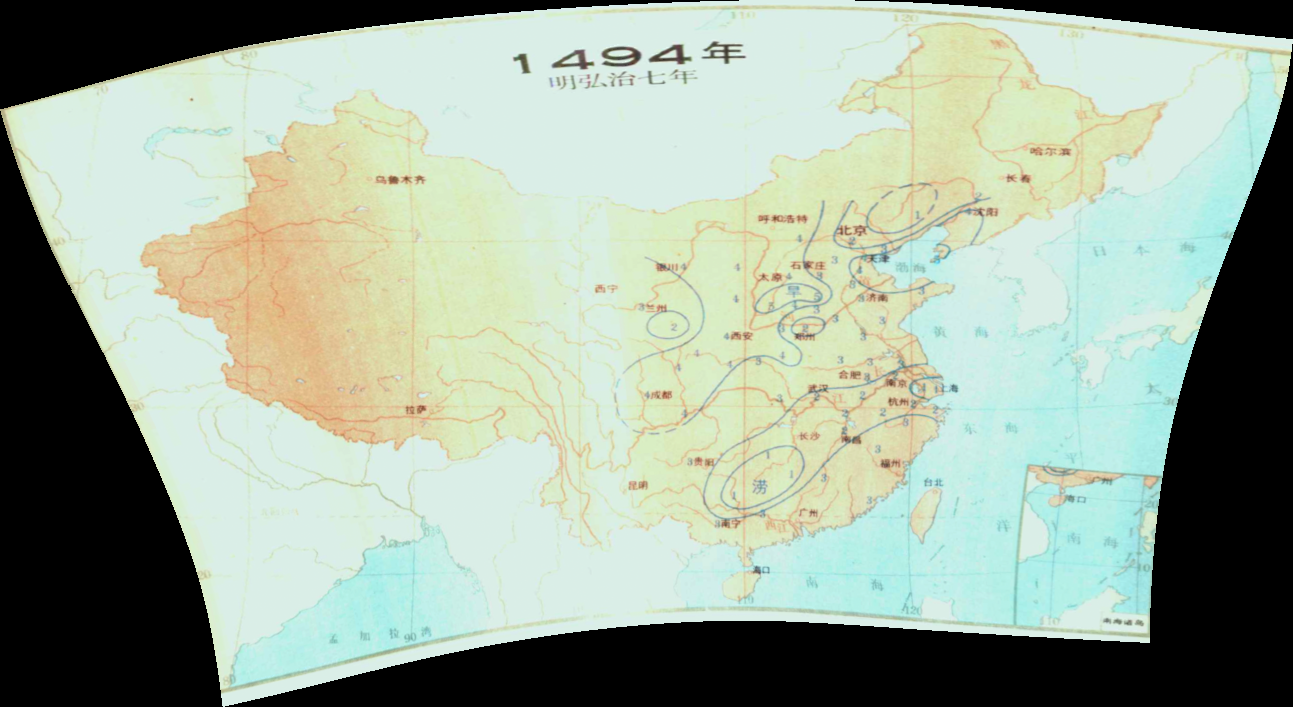

In [3]:
import folium
import rasterio
from rasterio.plot import reshape_as_image

geotiff = "../data/outputs/map18_1494_georef.tif"

with rasterio.open(geotiff) as src:
    bounds = src.bounds
    img = reshape_as_image(src.read())

m = folium.Map(location=[(bounds.top+bounds.bottom)/2, (bounds.left+bounds.right)/2], zoom_start=5)
folium.raster_layers.ImageOverlay(
    image=img,
    bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
    opacity=0.6
).add_to(m)

m.save("../data/outputs/map18_1494_interactive.html")
m